In [1]:
%matplotlib inline


Transfer Learning tutorial
==========================
**Author**: `Sasank Chilamkurthy <https://chsasank.github.io>`_

In this tutorial, you will learn how to train your network using
transfer learning. You can read more about the transfer learning at `cs231n
notes <http://cs231n.github.io/transfer-learning/>`__

Quoting these notes,

    In practice, very few people train an entire Convolutional Network
    from scratch (with random initialization), because it is relatively
    rare to have a dataset of sufficient size. Instead, it is common to
    pretrain a ConvNet on a very large dataset (e.g. ImageNet, which
    contains 1.2 million images with 1000 categories), and then use the
    ConvNet either as an initialization or a fixed feature extractor for
    the task of interest.

These two major transfer learning scenarios look as follows:

-  **Finetuning the convnet**: Instead of random initializaion, we
   initialize the network with a pretrained network, like the one that is
   trained on imagenet 1000 dataset. Rest of the training looks as
   usual.
-  **ConvNet as fixed feature extractor**: Here, we will freeze the weights
   for all of the network except that of the final fully connected
   layer. This last fully connected layer is replaced with a new one
   with random weights and only this layer is trained.




In [11]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import torch.utils.data as data
import matplotlib.pyplot as plt
import time
import os
import copy

import pandas as pd

plt.ion()   # interactive mode

Load Data
---------

We will use torchvision and torch.utils.data packages for loading the
data.

The problem we're going to solve today is to train a model to classify
**ants** and **bees**. We have about 120 training images each for ants and bees.
There are 75 validation images for each class. Usually, this is a very
small dataset to generalize upon, if trained from scratch. Since we
are using transfer learning, we should be able to generalize reasonably
well.

This dataset is a very small subset of imagenet.

.. Note ::
   Download the data from
   `here <https://download.pytorch.org/tutorial/hymenoptera_data.zip>`_
   and extract it to the current directory.



In [35]:
inception = models.inception_v3(pretrained=True)

In [84]:
resnet = models.resnet152(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /Users/sonynka/.torch/models/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:29<00:00, 8215327.03it/s] 


In [85]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

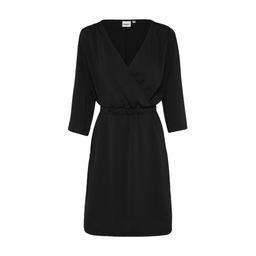

In [86]:
from PIL import Image

img_path = './test_images/black_dress.jpg'
img = Image.open(img_path)

In [87]:
img_tensor = data_transforms(img).unsqueeze(0)
print(img_tensor.shape)


out = resnet(img_tensor)
print(out.shape)

torch.Size([1, 3, 224, 224])
torch.Size([1, 1000])


In [88]:
modules = list(resnet.children())[:-1]
resnet_last = nn.Sequential(*modules)
img1_out = resnet_last(img_tensor).squeeze().data.numpy()

In [89]:
img2_path = './test_images/black_dress2.jpg'
img2 = Image.open(img2_path)
img2_tensor = data_transforms(img2).unsqueeze(0)
img2_out = resnet_last(img2_tensor).squeeze().data.numpy()

In [90]:
img3_path = './test_images/floral_red_dress.jpg'
img3 = Image.open(img3_path)
img3_tensor = data_transforms(img3).unsqueeze(0)
img3_out = resnet_last(img3_tensor).squeeze().data.numpy()

In [91]:
img4_path = './test_images/pink_dress_aline.jpg'
img4 = Image.open(img4_path)
img4_tensor = data_transforms(img4).unsqueeze(0)
img4_out = resnet_last(img4_tensor).squeeze().data.numpy()

In [92]:
img5_path = './test_images/red_lace_dress.jpg'
img5 = Image.open(img5_path)
img5_tensor = data_transforms(img5).unsqueeze(0)
img5_out = resnet_last(img5_tensor).squeeze().data.numpy()

In [100]:
imgs_out = np.stack([img1_out, img2_out, img3_out, img4_out, img5_out], axis=0)

In [101]:
from sklearn.metrics.pairwise import pairwise_distances
pairwise_distances(imgs_out)

array([[ 0.        ,  2.13905621,  2.26151299,  2.25770426,  2.2824738 ],
       [ 2.13905621,  0.        ,  2.31544113,  2.33107257,  2.28740215],
       [ 2.26151299,  2.31544113,  0.        ,  2.2159698 ,  2.32777762],
       [ 2.25770426,  2.33107257,  2.2159698 ,  0.        ,  2.41827488],
       [ 2.2824738 ,  2.28740215,  2.32777762,  2.41827488,  0.        ]], dtype=float32)

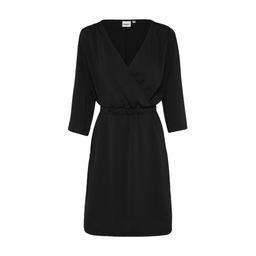

In [94]:
img

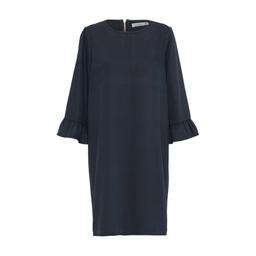

In [95]:
img2

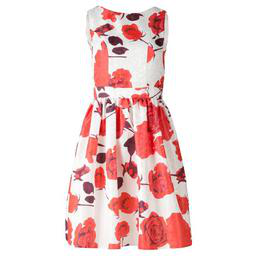

In [96]:
img3

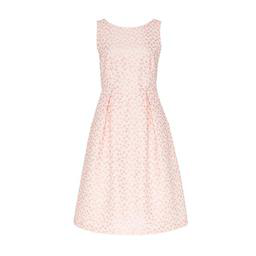

In [97]:
img4

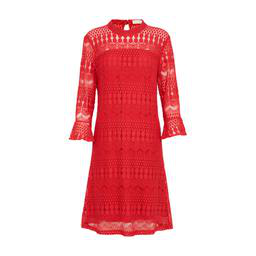

In [98]:
img5